# Checking optimized RCs for self-consistency

In [2]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

from sgoop.containers import load
from sgoop.sgoop import reweight
from sgoop.sgoop import sgoop

from sgoop.sgoop import bin_max_cal

In [3]:
def plot_spectral_gap(single_sgoop, opt_rc, trial_rc, 
                      save_file='sg_plot.png'):
    single_sgoop.max_cal_traj = single_sgoop.max_cal_traj.iloc[:5000, :]
    single_sgoop.metad_traj = single_sgoop.metad_traj.iloc[::10, :]
    # get probabilities to check for 2 wells
    opt_prob, opt_grid = reweight(
        opt_rc, single_sgoop.metad_traj, single_sgoop.cv_cols, 
        single_sgoop.v_minus_c_col, rc_bins=single_sgoop.rc_bins
    )
    trial_prob, trial_grid = reweight(
        trial_rc, single_sgoop.metad_traj, single_sgoop.cv_cols, 
        single_sgoop.v_minus_c_col, rc_bins=single_sgoop.rc_bins
    )

    # get spectral gap for each
    opt_binned = bin_max_cal(
        opt_rc, single_sgoop.max_cal_traj, opt_grid
    )
    trial_binned = bin_max_cal(
        trial_rc, single_sgoop.max_cal_traj, trial_grid
    )

    opt_sg = sgoop(
        opt_prob, opt_binned, single_sgoop.d,
        single_sgoop.wells, **single_sgoop.storage_dict
    )
    trial_sg = sgoop(
        trial_prob, trial_binned, single_sgoop.d,
        single_sgoop.wells, **single_sgoop.storage_dict
    )
    print(f'optimized gap: {opt_sg:7.4}')
    print(f'    trial gap: {trial_sg:7.4}')
    # plot 
    plt.scatter(
        np.arange(len(single_sgoop.storage_dict['ev_list'][-2])),
        np.exp(-single_sgoop.storage_dict['ev_list'][-2]),
        label='optimized RC'
    )
    plt.scatter(
        np.arange(len(single_sgoop.storage_dict['ev_list'][-1])),
        np.exp(-single_sgoop.storage_dict['ev_list'][-1]),
        label='trial RC'
    )
    plt.legend(frameon=False)
    plt.savefig(save_file, dpi=300, bbox_inches='tight')

In [4]:
def plot_pmf(single_sgoop, opt_rc, trial_rc, 
             save_file='pmf_plot.png'):
    single_sgoop.max_cal_traj = single_sgoop.max_cal_traj.iloc[:5000, :]
    single_sgoop.metad_traj = single_sgoop.metad_traj.iloc[::100, :]
    # get probabilities 
    opt_prob, opt_grid = reweight(
        opt_rc, single_sgoop.metad_traj, single_sgoop.cv_cols, 
        single_sgoop.v_minus_c_col, rc_bins=50,
        kde=True
    )
    opt_grid_normal = (
        (opt_grid - opt_grid.min())
        / (opt_grid.max() - opt_grid.min())
    )
    trial_prob, trial_grid = reweight(
        trial_rc, single_sgoop.metad_traj, single_sgoop.cv_cols, 
        single_sgoop.v_minus_c_col, rc_bins=50,
        kde=True
    )
    trial_grid_normal = (
        (trial_grid - trial_grid.min())
        / (trial_grid.max() - trial_grid.min())
    )

    # plot reweighted probabilities
    plt.plot(opt_grid_normal, -np.ma.log(opt_prob),
         label='optimized RC')
    plt.plot(trial_grid_normal, -np.ma.log(trial_prob),
         label='trial RC', alpha=0.5)
    plt.legend(frameon=False)
    plt.savefig(save_file, dpi=300, bbox_inches='tight')

In [8]:
# Specify the filenames for your biased and unbiased runs
metad_file = '../sgoop/data/F399_COLVAR_8ns'  # biased colvar file
max_cal_file = '../sgoop/data/max_cal.COLVAR'  # unbiased colvar file

# specify columns you want to require
sgoop_params = {
    # specify rbias and cv column names
    'v_minus_c_col': 'metad.rbias',
    'cv_cols': ['dist', 'I384_dist', 'N387_dist', 'F399_dist',
                'L403_dist', 'V429_dist', 'A445_dist', 'L449_dist',
                'R406_dist.min', 'Y407_dist.min', 'L426_dist.min',
                'R481_dist.min', 'S485_dist.min', 'I384_R406',
                'I384_S485', 'R406_S485'],
    # adjust sgoop params
    'rc_bins': 20,
    'wells': 2,
    'd': 1,
    # create lists for storage, if ya want
    'rc_list': [],
    'prob_list': [],
    'ev_list': [],
    'sg_list': []
}

In [9]:
# define trial RC for comparison
trial_rc = [0, 0, 0, 1,
            0, 0, 0, 0,
            0, 0, 0, 0,
            0, 0, 0, 0]

# 2 wells

In [10]:
# load colvar files to
single_sgoop = load(max_cal_file, metad_file, **sgoop_params)
# define number of wells and optimized rc
single_sgoop.wells = 2

# define number of wells and optimized rc
opt_rc_2 = [1.91281797, 0.53659188, -1.5860905, 0.6863501,
            -1.0349446, 0.87609754, -2.82593567, 1.51869468,
            2.97309824, -0.8632295, 1.26741426, 2.18298938,
            -1.72887152, 0.2888114, 0.3339394, 1.92809238]
opt_rc_2 = opt_rc_2 / np.sqrt(np.sum(np.square(opt_rc_2)))

optimized gap:  0.9673
    trial gap: 0.06368


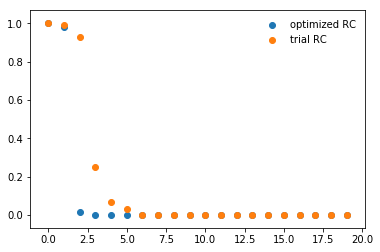

In [11]:
plot_spectral_gap(single_sgoop, opt_rc_2, trial_rc, 
                  save_file='2_well_sg.png')

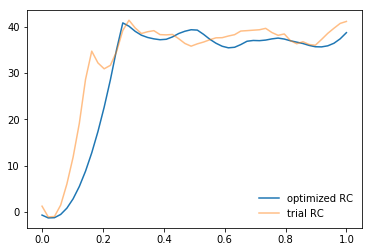

In [12]:
plot_pmf(single_sgoop, opt_rc_2, trial_rc, save_file='2_well_pmf.png')

# 3 wells

In [9]:
# load colvar files to
single_sgoop = load(max_cal_file, metad_file, **sgoop_params)

# define number of wells and optimized rc
single_sgoop.wells = 3

# define number of wells and optimized rc
opt_rc_3 = [1.01598521, -0.26485907, 1.44132428, -0.38629675,
            -0.38607727, 0.97515423, 3.75275857, 0.87873952,
            4.38119238, -0.02053303, -1.87883904, -0.53885457,
            -2.65171314, -1.33215866, -3.44370609, -2.74297201]
opt_rc_3 = opt_rc_3 / np.sqrt(np.sum(np.square(opt_rc_3)))

optimized gap:  0.9306
    trial gap:  0.6764


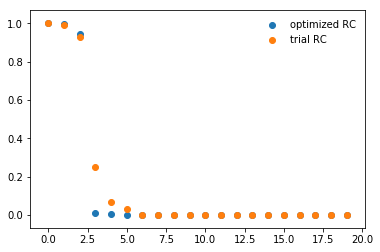

In [10]:
plot_spectral_gap(single_sgoop, opt_rc_3, trial_rc, 
                  save_file='3_well_sg.png')

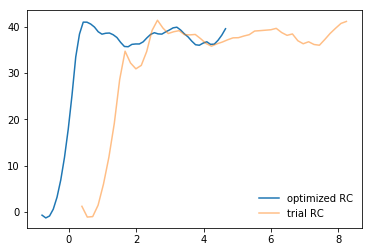

In [11]:
plot_pmf(single_sgoop, opt_rc_3, trial_rc, save_file='3_well_pmf.png')

In [12]:
# load colvar files to
single_sgoop = load(max_cal_file, metad_file, **sgoop_params)

# define number of wells and optimized rc
single_sgoop.wells = 4

# define number of wells and optimized rc
opt_rc_4 = [-5.466326637473431, 0.44267941700020214, 3.14349295504298, 2.6902693454069815, 
            -0.2724783521097577, 5.98034615600331, 5.492111114876188, -0.026551135399426495, 
            2.308408119280119, 7.020784754061304, 6.311360004087932, -1.3731741540399338, 
            -7.550736228773942, 5.135296880554222, -1.3298639190344999, 5.42182382292467]
opt_rc_4 = opt_rc_4 / np.sqrt(np.sum(np.square(opt_rc_4)))

In [13]:
print(f"Coefficients for MetaD, from opt_log_3.txt:\n"
      f"{','.join([str(coeff)[:10] for coeff in opt_rc_4])}")

Coefficients for MetaD, from opt_log_3.txt:
-0.3036439,0.02458999,0.17461500,0.14943929,-0.0151356,0.33219675,0.30507623,-0.0014748,0.12822764,0.38999111,0.35058393,-0.0762771,-0.4194289,0.28525588,-0.0738713,0.30117190


optimized gap:  0.9275
    trial gap:  0.1841


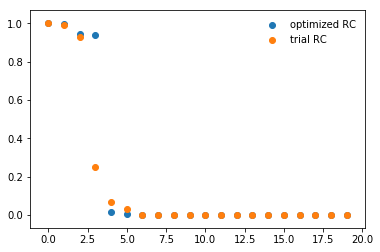

In [14]:
plot_spectral_gap(single_sgoop, opt_rc_4, trial_rc, 
                  save_file='4_well_sg.png')

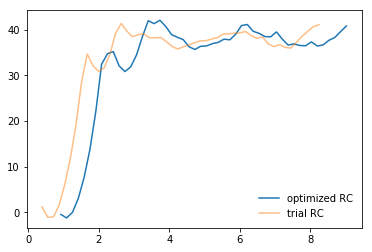

In [15]:
plot_pmf(single_sgoop, opt_rc_4, trial_rc, save_file='4_well_pmf.png')

In [16]:
single_sgoop = load(max_cal_file, metad_file, **sgoop_params)
# define number of wells and optimized rc
single_sgoop.wells = 5

# define number of wells and optimized rc
opt_rc_5 = [2.1829263511568455, -4.084099608823631, -2.956503660739593, 6.600973412442483, 
            -0.5433716141288764, -2.403663532902858, 5.148386368419621, -2.284792347705852, 
            7.42795063528501, 7.37210534317033, 5.458805544541007, -4.720280311259497, 
            -1.2431437349667191, -0.686271145870415, 8.211928687055153, -2.4218863776417363]
opt_rc_5 = opt_rc_5 / np.sqrt(np.sum(np.square(opt_rc_5)))

In [17]:
print(f"Coefficients for MetaD, from opt_log_3.txt:\n"
      f"{','.join([str(coeff)[:10] for coeff in opt_rc_5])}")

Coefficients for MetaD, from opt_log_3.txt:
0.11693693,-0.2187806,-0.1583766,0.35360681,-0.0291078,-0.1287615,0.27579333,-0.1223937,0.39790706,0.39491549,0.29242214,-0.2528601,-0.0665938,-0.0367627,0.43990389,-0.1297377


optimized gap:  0.8024
    trial gap: 0.03768


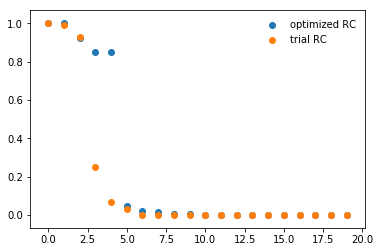

In [18]:
plot_spectral_gap(single_sgoop, opt_rc_5, trial_rc, 
                  save_file='5_well_sg.png')

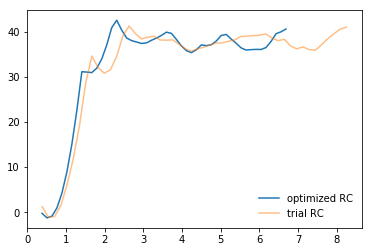

In [19]:
plot_pmf(single_sgoop, opt_rc_5, trial_rc, save_file='5_well_pmf.png')

In [20]:
# load colvar files to
single_sgoop = load(max_cal_file, metad_file, **sgoop_params)

# define number of wells and optimized rc
single_sgoop.wells = 6

# define number of wells and optimized rc
opt_rc_6 = [1.1756858395438805, 1.838397363163547, -1.370618478269159, 2.477544162198961, 
            0.6584426454763298, -2.3583291924718814, -1.1459297549357133, 0.5161767399577569, 
            -2.1448241640018697, 2.6479785362453634, 1.7358702063744196, 1.1179902606694305, 
            0.6144892522978036, 0.3428257540723808, 4.277028915755738, -4.561909096220405]
opt_rc_6 = opt_rc_6 / np.sqrt(np.sum(np.square(opt_rc_6)))

In [21]:
print(f"Coefficients for MetaD, from opt_log_3.txt:\n"
      f"{','.join([str(coeff)[:10] for coeff in opt_rc_6])}")

Coefficients for MetaD, from opt_log_3.txt:
0.13501332,0.21111774,-0.1573989,0.28451604,0.07561419,-0.2708256,-0.1315962,0.05927666,-0.2463071,0.30408837,0.19934374,0.12838768,0.07056667,0.03936940,0.49116514,-0.5238801


optimized gap:  0.4381
    trial gap: 0.02746


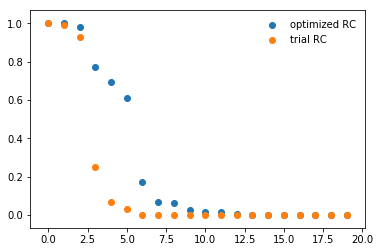

In [22]:
plot_spectral_gap(single_sgoop, opt_rc_6, trial_rc, 
                  save_file='6_well_sg.png')

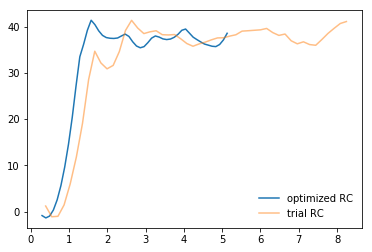

In [23]:
plot_pmf(single_sgoop, opt_rc_6, trial_rc, save_file='6_well_pmf.png')